## CNN
1. Load mnist dataset
2. Normalize the dataset
3. Convert and to categorical
4. Create of model
5. Compile the model
6. Model Training
7. Evaluate the model
8. Predict an image


In [1]:
import keras
import numpy as np
from keras.models import Model
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Input,Dropout
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from Dataset import DataSetBacteria
from matplotlib import pyplot as plt
from keras.callbacks import TensorBoard
import time,os
%matplotlib inline


Using TensorFlow backend.


### Load dataset

(17248, 330, 330, 3)
(17248,)
['train\\AcinetobacterBaumanii', 'train\\BacteroidesFragilis', 'train\\CandidaAlbicans', 'train\\ClostridiumPerfringens', 'train\\EnterococcusFaecalis', 'train\\EnterococcusFaecium', 'train\\EscherichiaColi', 'train\\LactobacillusCasei', 'train\\LactobacillusCrispatus', 'train\\LactobacillusDelbrueckii', 'train\\LactobacillusGasseri', 'train\\LactobacillusJehnsenii', 'train\\LactobacillusJohnsonii', 'train\\LactobacillusParacasei', 'train\\LactobacillusPlantarum', 'train\\LactobacillusReuteri', 'train\\LactobacillusRhamnosus', 'train\\LactobacillusSalivarius', 'train\\MicrococcusSpp', 'train\\NeisseriaGonorrhoeae', 'train\\PorfyromonasGingivalis', 'train\\PropionibacteriumAcnes', 'train\\Proteus', 'train\\PseudomonasAeruginosa', 'train\\StaphylococcusAureus', 'train\\StaphylococcusEpidermidis', 'train\\StreptococcusAgalactiae', 'train\\naoBacteria']
(5970, 330, 330, 3)
(5970,)
['test\\AcinetobacterBaumanii', 'test\\BacteroidesFragilis', 'test\\CandidaAlbic

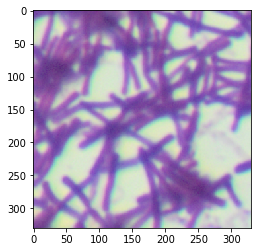

In [2]:
w = 330
h = 330
c = 3

train = DataSetBacteria()
train.load('dataset/train_qtd_classes(28).npz',True)
x_train,y_train = train.getDataSet()
x_train = np.float32(x_train)
x_train = x_train/255

test = DataSetBacteria()
test.load('dataset/test_qtd_classes(28).npz',True)
x_test, y_test = test.getDataSet()
x_test = np.float32(x_test)
x_test = x_test/255

ev = DataSetBacteria()
ev.load('dataset/eval_qtd_classes(28).npz',True)
x_ev, y_ev = test.getDataSet()
x_ev = np.float32(x_ev)
x_ev = x_ev/255

n_classes =len(train.getClasses())

plt.imshow(x_train[2])

### To Categorical
Before

In [3]:
y_train[0:3]

array(['14', '16', '15'], dtype='<U31')

After

In [4]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
y_ev = keras.utils.to_categorical(y_ev)

y_train[0:3]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

### Model

In [13]:
from Models import LeNet

model,model_label = LeNet(w,h,c,n_classes)

print("Model:" + model_label)

model.summary()

Model:LeNet
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input1 (InputLayer)          (None, 330, 330, 3)       0         
_________________________________________________________________
Conv1 (Conv2D)               (None, 330, 330, 20)      1520      
_________________________________________________________________
pooling1 (MaxPooling2D)      (None, 165, 165, 20)      0         
_________________________________________________________________
Conv2 (Conv2D)               (None, 165, 165, 20)      10020     
_________________________________________________________________
pooling2 (MaxPooling2D)      (None, 82, 82, 20)        0         
_________________________________________________________________
flatten (Flatten)            (None, 134480)            0         
_________________________________________________________________
Dense1 (Dense)               (None, 500)               67240500 

In [14]:
opt = Adam(lr=0.0001,decay=0.1e-6)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

### Load Weights

In [15]:
try:
    model.load_weights(filepath='{} peso.hdf5'.format(model_label))
    print("Loaded")
except Exception as ex:    
    print(ex)


Unable to open file (unable to open file: name = 'LeNet peso.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)


### Train

if filepath is 'weights.{epoch:02d}-{val_loss:.2f}.hdf5', for each epoch, one file will be created

In [16]:
dir_pesos = 'pesos/'
if not os.path.exists(dir_pesos):
    os.mkdir(dir_pesos)

tensorboard = TensorBoard(log_dir="tensorborad//{}".format(time.time()))
checkpoint = ModelCheckpoint(filepath=dir_pesos+'/peso_'+model_label +'.{epoch:02d}-{val_loss:.3f}.hdf5',monitor='val_acc',verbose=1,mode = 'max')

model.fit(x=x_train,y=y_train,batch_size=90,epochs=25,validation_data=(x_test,y_test),callbacks=[checkpoint,tensorboard])

Train on 17248 samples, validate on 5970 samples
Epoch 1/25


ResourceExhaustedError: OOM when allocating tensor with shape[134480,500] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node training_1/Adam/gradients/Dense1_3/MatMul_grad/MatMul_1}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


### Evaluate the model

In [ ]:
ev = model.evaluate(x=x_ev,y=y_ev)
print('loss:\t',ev[0])
print('acc:\t',ev[1])

### Predicting an image

In [ ]:
def predict(img):    
    shape = [1,img.shape[0],img.shape[1],3]
    img = img.reshape(shape)
    
    pred = model.predict(img)
        
    num = np.argmax(pred)
    percent = np.max(pred)
    c = train.getClasses()[num]
    return num,percent,c

In [ ]:
for i in range(25,40):
    img = x_test[i]
    number,percent,c = predict(img)
    plt.figure()
    plt.title(" Number:{n}\n{p}%".format(n=c,p=percent))
    plt.imshow(img.reshape(383,512,3))

### Other tests

In [ ]:
import cv2 as cv

def open_img(path,w=512,h=383):
    img = cv.imread(path)
  
    img = img.astype('float32')/255
    return img

In [ ]:
import imghdr,os

PATH = "./IMG_Test/"
for root,_,files in os.walk(PATH):
    for filename in files:
        x = os.path.join(root,filename)
        if os.path.isfile(x) :
            isImg = imghdr.what(x)
            if isImg:
                img = open_img(x)
                img =cv.cvtColor(img,cv.COLOR_RGB2GRAY)
                img =cv.cvtColor(img,cv.COLOR_GRAY2RGB)
                
                number,percent,c = predict(img)
                plt.figure()
                plt.title("{i} Number:{n}\n{p}%".format(i=number,n=c,p=percent))
                plt.imshow(img)
